In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme()

In [6]:
# Get a list of all files which are .csv files in ../DOTSSimulator/Assets/SimulationResults
import os
files = [f for f in os.listdir('../DOTSSimulator/Assets/SimulationResults') if f.endswith('.csv')]
# Sort the files descending
files.sort(reverse=True)

print(f'Found {len(files)} files')
print(f'Newest file: {files[0]}')

result_file_path = f'../DOTSSimulator/Assets/SimulationResults/{files[0]}'

Found 13 files
Newest file: 2023-02-22-14-56-35.csv


In [7]:
results_df = pd.read_csv(result_file_path)

results_df.head()

,Step,AvgEnergy,NoBoids,NoFoodSources,TotalFoodAvailable,Polarization,Expanse
0,0,10.000000,100,4,200.0000,0.499653,4.784925
1,10,9.494967,100,4,190.8339,0.380438,1.603114
2,20,9.201806,100,4,160.1597,0.474900,1.015026
3,30,8.966489,100,4,123.6965,0.308452,0.651758
4,40,8.812675,100,4,79.0912,0.392846,0.586549


In [8]:
def combine_axis_in_legend(axs, ax_to_legend):
    hanbdles =[]
    labels = []
    for ax_1 in axs:
        handle, label = ax_1.get_legend_handles_labels()
        hanbdles.extend(handle)
        labels.extend(label)
    ax_to_legend.legend(hanbdles, labels, loc=0)

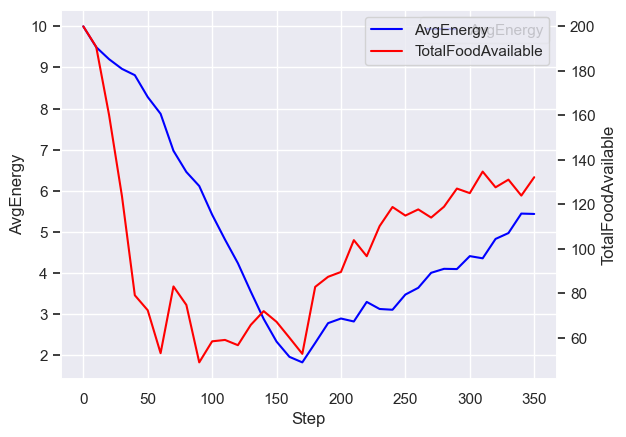

In [9]:
fig = plt.figure()
ax = fig.add_subplot()
sns.lineplot(data=results_df, x='Step', y='AvgEnergy', label='AvgEnergy', color='blue', ax=ax)
ax2 = plt.twinx()
ax2.grid(False)
sns.lineplot(data=results_df, x='Step', y='TotalFoodAvailable', label='TotalFoodAvailable', ax=ax2, color='red')
combine_axis_in_legend([ax, ax2], ax2)

<AxesSubplot: xlabel='Step', ylabel='NoBoids'>

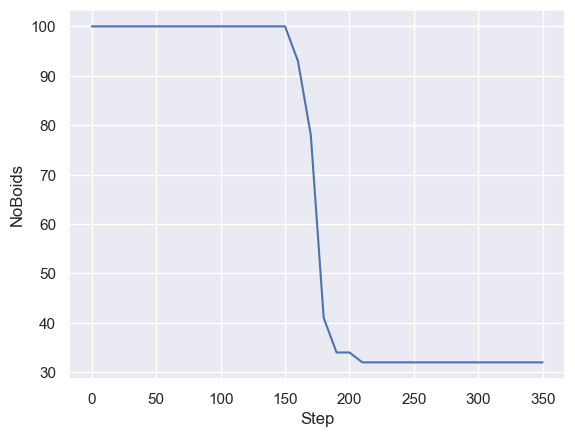

In [10]:
sns.lineplot(data=results_df, x='Step', y='NoBoids')

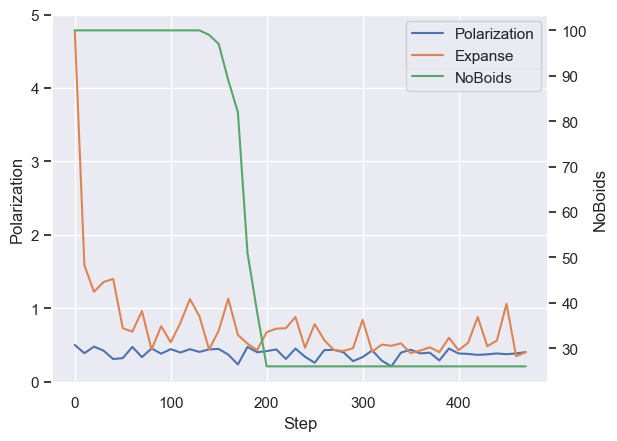

In [31]:
fig = plt.figure()
ax = fig.add_subplot()
sns.lineplot(data=results_df, x='Step', y='Polarization', label='Polarization', ax=ax)
sns.lineplot(data=results_df, x='Step', y='Expanse', label='Expanse', ax=ax)

ax2 = plt.twinx()
ax2.grid(False)
sns.lineplot(data=results_df, x='Step', y='NoBoids', color="g", label='NoBoids', ax=ax2)

combine_axis_in_legend([ax, ax2], ax2)
